Sample data:


,area,bedrooms,bathrooms,price
0,2600,3,2,550000
1,3000,4,3,565000
2,3200,3,2,610000
3,3600,5,3,595000
4,4000,4,3,670000



--- Single Variable Linear Regression ---
Predicted price for 3000 sq.ft: $575993.15


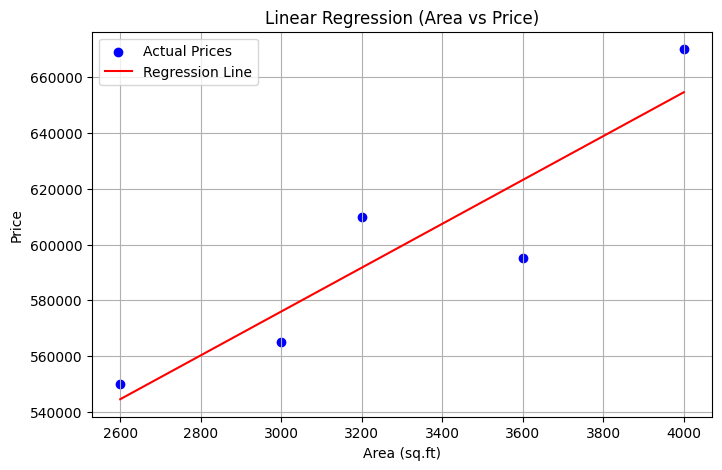


--- Multiple Variable Linear Regression ---
RMSE: 10793.52
R² Score: 0.96


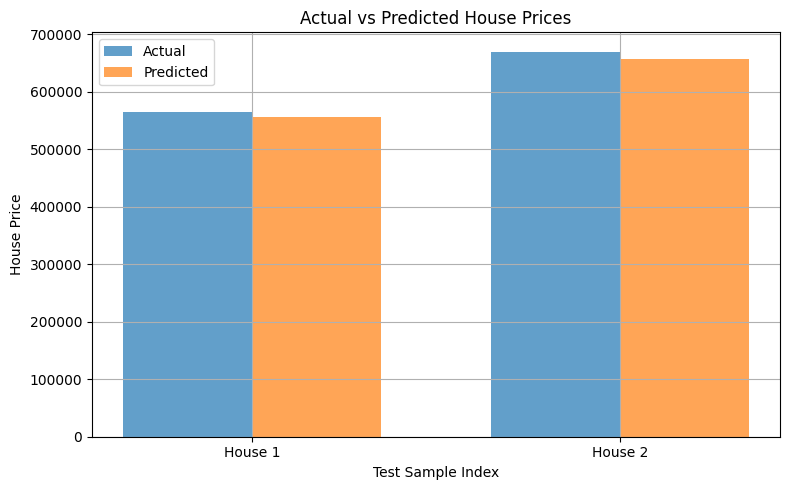

In [4]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Simulated dataset
data = {
    'area': [2600, 3000, 3200, 3600, 4000],
    'bedrooms': [3, 4, 3, 5, 4],
    'bathrooms': [2, 3, 2, 3, 3],
    'price': [550000, 565000, 610000, 595000, 670000]
}

df = pd.DataFrame(data)

# Display dataset
print("Sample data:")
display(df)

### Single Variable Linear Regression (Area only)
print("\n--- Single Variable Linear Regression ---")
X = df[['area']]
y = df['price']

model = LinearRegression()
model.fit(X, y)

# Prediction
area_to_predict = np.array([[3000]])
predicted_price = model.predict(area_to_predict)
print(f"Predicted price for 3000 sq.ft: ${predicted_price[0]:.2f}")

# Plotting Line Graph
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual Prices')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title("Linear Regression (Area vs Price)")
plt.xlabel("Area (sq.ft)")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

### Multiple Variable Linear Regression
print("\n--- Multiple Variable Linear Regression ---")
X_multi = df[['area', 'bedrooms', 'bathrooms']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.4, random_state=42)
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

# Evaluate
y_pred = model_multi.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Bar Graph: Actual vs Predicted Prices
plt.figure(figsize=(8, 5))
bar_width = 0.35
index = np.arange(len(y_test))

plt.bar(index, y_test, bar_width, label='Actual', alpha=0.7)
plt.bar(index + bar_width, y_pred, bar_width, label='Predicted', alpha=0.7)

plt.xlabel('Test Sample Index')
plt.ylabel('House Price')
plt.title('Actual vs Predicted House Prices')
plt.xticks(index + bar_width / 2, labels=[f"House {i+1}" for i in range(len(y_test))])
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()
